# New Orleans Crime Stats for 2022
---
## Starter Code to Import Libraries and Load Crime Statistics

The dataset is for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race for the year 2022.


In [2]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the csv into a Pandas Data Frame
crime_2022 = pd.read_csv("Resources/police2022.csv")

# Examine the data frame
crime_2022.head()


,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,C-00811-22,2022,4,Bodenger Bd & Mardi Gras Bd,CLOSED,37,AGGRAVATED ASSAULT,3/1/22 18:36,14 94,ILLEGAL USE OF WEAPONS,...,MALE,60.0,2.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
1,G-01318-22,2022,7,043XX Dodt Av #3,OPEN,103,DISTURBANCE,7/2/22 9:00,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
2,F-08049-22,2022,7,044XX Francis Dr,OPEN,56,SIMPLE CRIMINAL DAMAGE,6/9/22 11:00,NaN,NaN,...,NaN,NaN,2.0,VICTIM,BLACK,MALE,NaN,Non-fatal,NaN,Incident Report
3,G-01211-22,2022,5,006XX Reynes St,OPEN,67A,AUTO THEFT,7/2/22 2:00,14 67.26,THEFT OF A MOTOR VEHICLE,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,52.0,Non-fatal,NaN,Incident Report
4,G-01290-22,2022,6,Carondelet St & Erato St,OPEN,24,MEDICAL,7/2/22 8:24,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,21.0,Non-fatal,NaN,Incident Report


In [4]:
# Examine the data types within the dataset
crime_2022.dtypes

Item_Number             object
Year                     int64
District                 int64
Location                object
Disposition             object
Signal_Type             object
Signal_Description      object
Occurred_Date_Time      object
Charge_Code             object
Charge_Description      object
Offender_Number        float64
OffenderID             float64
OffenderStatus          object
Offender_Race           object
Offender_Gender         object
Offender_Age           float64
Victim_Number          float64
PersonType              object
Victim_Race             object
Victim_Gender           object
Victim_Age             float64
Victim_Fatal_Status     object
Hate Crime              object
Report Type             object
dtype: object

In [5]:
len(crime_2022.index)

93008

In [6]:
# Convert Occurred_Date_Time from integer to date time.
crime_2022['Occurred_Date_Time'] = pd.to_datetime(crime_2022['Occurred_Date_Time'], utc=True)
crime_2022['Occurred_Date_Time'].dt.date

0        2022-03-01
1        2022-07-02
2        2022-06-09
3        2022-07-02
4        2022-07-02
            ...    
93003    2022-10-09
93004    2022-10-09
93005    2022-10-09
93006    2022-10-10
93007    2022-09-16
Name: Occurred_Date_Time, Length: 93008, dtype: object

In [7]:
# This code replaces the date/time in Occurred_Date_Time column with only the date.
crime_2022["Occurred_Date_Time"] = crime_2022["Occurred_Date_Time"].dt.date
print(crime_2022)

      Item_Number  Year  District                     Location Disposition  \
0      C-00811-22  2022         4  Bodenger Bd & Mardi Gras Bd      CLOSED   
1      G-01318-22  2022         7             043XX Dodt Av #3        OPEN   
2      F-08049-22  2022         7             044XX Francis Dr        OPEN   
3      G-01211-22  2022         5              006XX Reynes St        OPEN   
4      G-01290-22  2022         6     Carondelet St & Erato St        OPEN   
...           ...   ...       ...                          ...         ...   
93003  J-09114-22  2022         7      066XX N I-10 Service Rd        OPEN   
93004  J-08958-22  2022         5            021XX Painters St        OPEN   
93005  J-08958-22  2022         5            021XX Painters St        OPEN   
93006  J-09180-22  2022         4              029XX Sabine St        OPEN   
93007  I-15146-22  2022         1             022XX Poydras St      CLOSED   

      Signal_Type      Signal_Description Occurred_Date_Time Ch

In [8]:
# This views the data and conducts column counts.
crime_2022.count()

Item_Number            93008
Year                   93008
District               93008
Location               93008
Disposition            93008
Signal_Type            93008
Signal_Description     93008
Occurred_Date_Time     93008
Charge_Code            46591
Charge_Description     46591
Offender_Number        58182
OffenderID             58182
OffenderStatus         16033
Offender_Race          58157
Offender_Gender        58146
Offender_Age           22319
Victim_Number          90274
PersonType             90274
Victim_Race            78877
Victim_Gender          78998
Victim_Age             72061
Victim_Fatal_Status    93008
Hate Crime                36
Report Type            93008
dtype: int64

In [9]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = crime_2022.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2022
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,C-00811-22,2022,4,Bodenger Bd & Mardi Gras Bd,CLOSED,37,AGGRAVATED ASSAULT,2022-03-01,14 94,ILLEGAL USE OF WEAPONS,...,MALE,60.0,2.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
1,G-01318-22,2022,7,043XX Dodt Av #3,OPEN,103,DISTURBANCE,2022-07-02,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
2,F-08049-22,2022,7,044XX Francis Dr,OPEN,56,SIMPLE CRIMINAL DAMAGE,2022-06-09,NaN,NaN,...,NaN,NaN,2.0,VICTIM,BLACK,MALE,NaN,Non-fatal,NaN,Incident Report
3,G-01211-22,2022,5,006XX Reynes St,OPEN,67A,AUTO THEFT,2022-07-02,14 67.26,THEFT OF A MOTOR VEHICLE,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,52.0,Non-fatal,NaN,Incident Report
4,G-01290-22,2022,6,Carondelet St & Erato St,OPEN,24,MEDICAL,2022-07-02,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,21.0,Non-fatal,NaN,Incident Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92998,J-08924-22,2022,5,054XX N Robertson St,OPEN,67,THEFT,2022-10-09,14 67,THEFT,...,FEMALE,30.0,1.0,VICTIM,BLACK,FEMALE,39.0,Non-fatal,NaN,Incident Report
93001,J-09114-22,2022,7,066XX N I-10 Service Rd,OPEN,64J,ARMED CARJACKING,2022-10-09,14 64.2,CARJACKING,...,MALE,NaN,1.0,VICTIM,BLACK,FEMALE,37.0,Non-fatal,NaN,Incident Report
93004,J-08958-22,2022,5,021XX Painters St,OPEN,67A,AUTO THEFT,2022-10-09,14 67.26,THEFT OF A MOTOR VEHICLE,...,UNKNOWN,NaN,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
93006,J-09180-22,2022,4,029XX Sabine St,OPEN,103D,DISTURBANCE (DOMESTIC),2022-10-10,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,31.0,Non-fatal,NaN,Incident Report


In [10]:
# This drops duplicates from Item_Number, then stores the changes.
#crime_2022.drop_duplicates(keep=False, ignore_index=True, inplace=True)
#deduped_crime = crime_2022
deduped_crime.count()

Item_Number            54217
Year                   54217
District               54217
Location               54217
Disposition            54217
Signal_Type            54217
Signal_Description     54217
Occurred_Date_Time     54217
Charge_Code            29291
Charge_Description     29291
Offender_Number        30679
OffenderID             30679
OffenderStatus          7514
Offender_Race          30662
Offender_Gender        30660
Offender_Age           10854
Victim_Number          51483
PersonType             51483
Victim_Race            45359
Victim_Gender          45367
Victim_Age             42080
Victim_Fatal_Status    54217
Hate Crime                16
Report Type            54217
dtype: int64

In [11]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,C-00811-22,2022,4,Bodenger Bd & Mardi Gras Bd,CLOSED,37,AGGRAVATED ASSAULT,2022-03-01,14 94,ILLEGAL USE OF WEAPONS,...,MALE,60.0,2.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
1,G-01318-22,2022,7,043XX Dodt Av #3,OPEN,103,DISTURBANCE,2022-07-02,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
2,F-08049-22,2022,7,044XX Francis Dr,OPEN,56,SIMPLE CRIMINAL DAMAGE,2022-06-09,NaN,NaN,...,NaN,NaN,2.0,VICTIM,BLACK,MALE,NaN,Non-fatal,NaN,Incident Report
3,G-01211-22,2022,5,006XX Reynes St,OPEN,67A,AUTO THEFT,2022-07-02,14 67.26,THEFT OF A MOTOR VEHICLE,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,52.0,Non-fatal,NaN,Incident Report
4,G-01290-22,2022,6,Carondelet St & Erato St,OPEN,24,MEDICAL,2022-07-02,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,21.0,Non-fatal,NaN,Incident Report


In [12]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 

reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,C-00811-22,2022,4,37,AGGRAVATED ASSAULT,2022-03-01,MALE,Non-fatal
1,G-01318-22,2022,7,103,DISTURBANCE,2022-07-02,NaN,Non-fatal
2,F-08049-22,2022,7,56,SIMPLE CRIMINAL DAMAGE,2022-06-09,NaN,Non-fatal
3,G-01211-22,2022,5,67A,AUTO THEFT,2022-07-02,UNKNOWN,Non-fatal
4,G-01290-22,2022,6,24,MEDICAL,2022-07-02,NaN,Non-fatal


In [13]:
# Count how many incidents occurred
crime_type = reduced_crime_df ["Signal_Description"].value_counts()
crime_type

DISTURBANCE (DOMESTIC)       5938
SIMPLE BURGLARY (VEHICLE)    5559
AUTO THEFT                   3508
THEFT                        2659
SIMPLE CRIMINAL DAMAGE       2475
                             ... 
SIMPLE RAPE (MALE VICTIM)       1
ATTEMPTED SIMPLE ARSON          1
TRAFFIC ATTACHMENT              1
ORAL SEXUAL BATTERY             1
CURFEW VIOLATION                1
Name: Signal_Description, Length: 152, dtype: int64

In [14]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,107,107,107,107,107,2,107
AGGRAVATED ARSON,11,11,11,11,11,9,11
AGGRAVATED ASSAULT,699,699,699,699,699,646,699
AGGRAVATED ASSAULT (DOMESTIC),315,315,315,315,315,287,315
AGGRAVATED BATTERY,87,87,87,87,87,77,87
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,234,234,234,234,234,1,234
UNDERAGE DRINKING,1,1,1,1,1,1,1
VIDEO VOYEURISM,67,67,67,67,67,14,67


In [15]:
# Convert the Signal_Description into a DataFrame and retrieve the top ten offenses.
crime_specific_df = pd.DataFrame(crime_type)
crime_filtered = crime_specific_df.nlargest(10, columns=["Signal_Description"], keep= "all")
# Export the City_Data into a csv
crime_filtered.to_csv("output_data/2022_crime_10.csv")
crime_filtered

,Signal_Description
DISTURBANCE (DOMESTIC),5938
SIMPLE BURGLARY (VEHICLE),5559
AUTO THEFT,3508
THEFT,2659
SIMPLE CRIMINAL DAMAGE,2475
DISTURBANCE,2386
SIMPLE BATTERY (DOMESTIC),2223
LOST PROPERTY,1856
SIMPLE BATTERY,1707
THEFT BY FRAUD,1488


In [16]:
# Group by Signal_Description
reduced_crime_df.count_column=reduced_crime_df.groupby(["Signal_Description"]).Signal_Description.transform('count')
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,C-00811-22,2022,4,37,AGGRAVATED ASSAULT,2022-03-01,MALE,Non-fatal
1,G-01318-22,2022,7,103,DISTURBANCE,2022-07-02,NaN,Non-fatal
2,F-08049-22,2022,7,56,SIMPLE CRIMINAL DAMAGE,2022-06-09,NaN,Non-fatal
3,G-01211-22,2022,5,67A,AUTO THEFT,2022-07-02,UNKNOWN,Non-fatal
4,G-01290-22,2022,6,24,MEDICAL,2022-07-02,NaN,Non-fatal


In [17]:
top_10_crimes_22 = (reduced_crime_df["Signal_Description"].value_counts())[:10]
top_10_crimes_22

DISTURBANCE (DOMESTIC)       5938
SIMPLE BURGLARY (VEHICLE)    5559
AUTO THEFT                   3508
THEFT                        2659
SIMPLE CRIMINAL DAMAGE       2475
DISTURBANCE                  2386
SIMPLE BATTERY (DOMESTIC)    2223
LOST PROPERTY                1856
SIMPLE BATTERY               1707
THEFT BY FRAUD               1488
Name: Signal_Description, dtype: int64

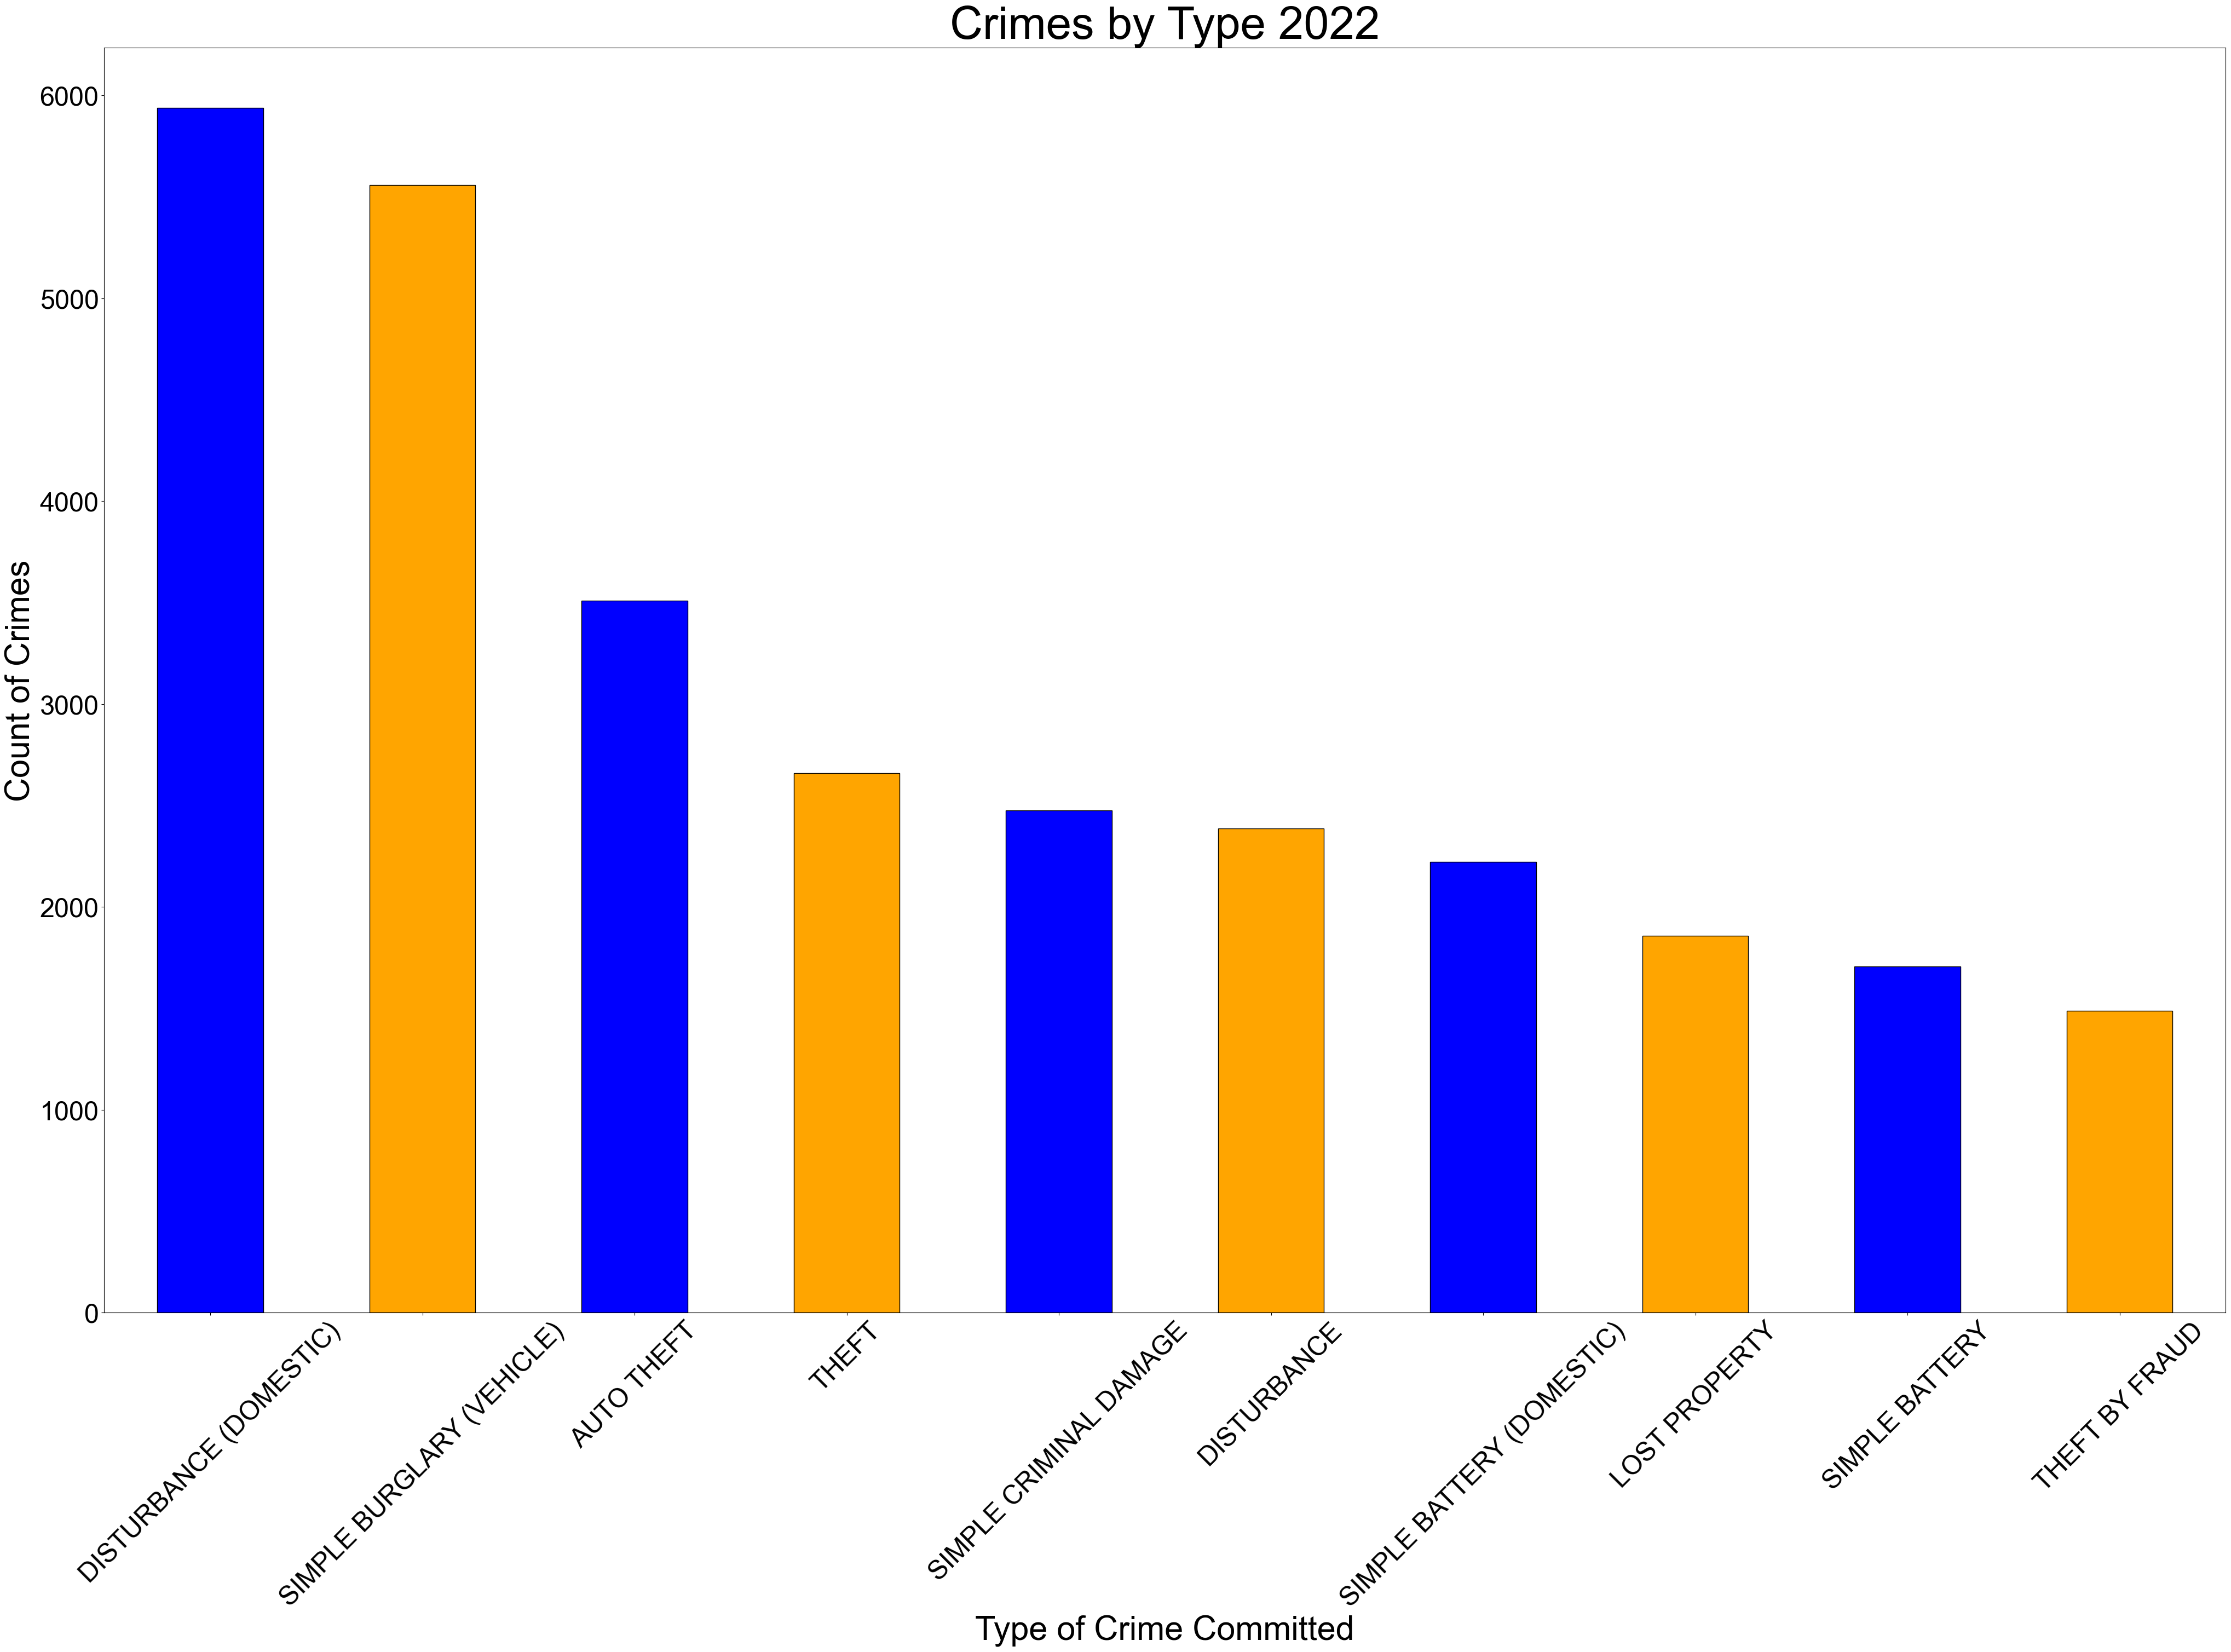

In [18]:
# Create a bar graph representing Signal_Description top ten with Counts
top_10_crimes_22.plot(kind='bar', edgecolor='black', rot=45, fontsize=35, color=["blue","orange"])
sns.set(style = 'darkgrid')
#add axis labels
plt.title("Crimes by Type 2022", fontsize=60)
plt.xlabel('Type of Crime Committed', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2022_crime_type.png")

In [19]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,107,107,107,107,107,2,107
AGGRAVATED ARSON,11,11,11,11,11,9,11
AGGRAVATED ASSAULT,699,699,699,699,699,646,699
AGGRAVATED ASSAULT (DOMESTIC),315,315,315,315,315,287,315
AGGRAVATED BATTERY,87,87,87,87,87,77,87
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,234,234,234,234,234,1,234
UNDERAGE DRINKING,1,1,1,1,1,1,1
VIDEO VOYEURISM,67,67,67,67,67,14,67


In [20]:
district_crimes_22 = (reduced_crime_df["District"].value_counts())[:10]
district_crimes_22

8    8102
7    7670
5    6771
6    5724
3    5576
1    5363
2    4871
4    4372
Name: District, dtype: int64

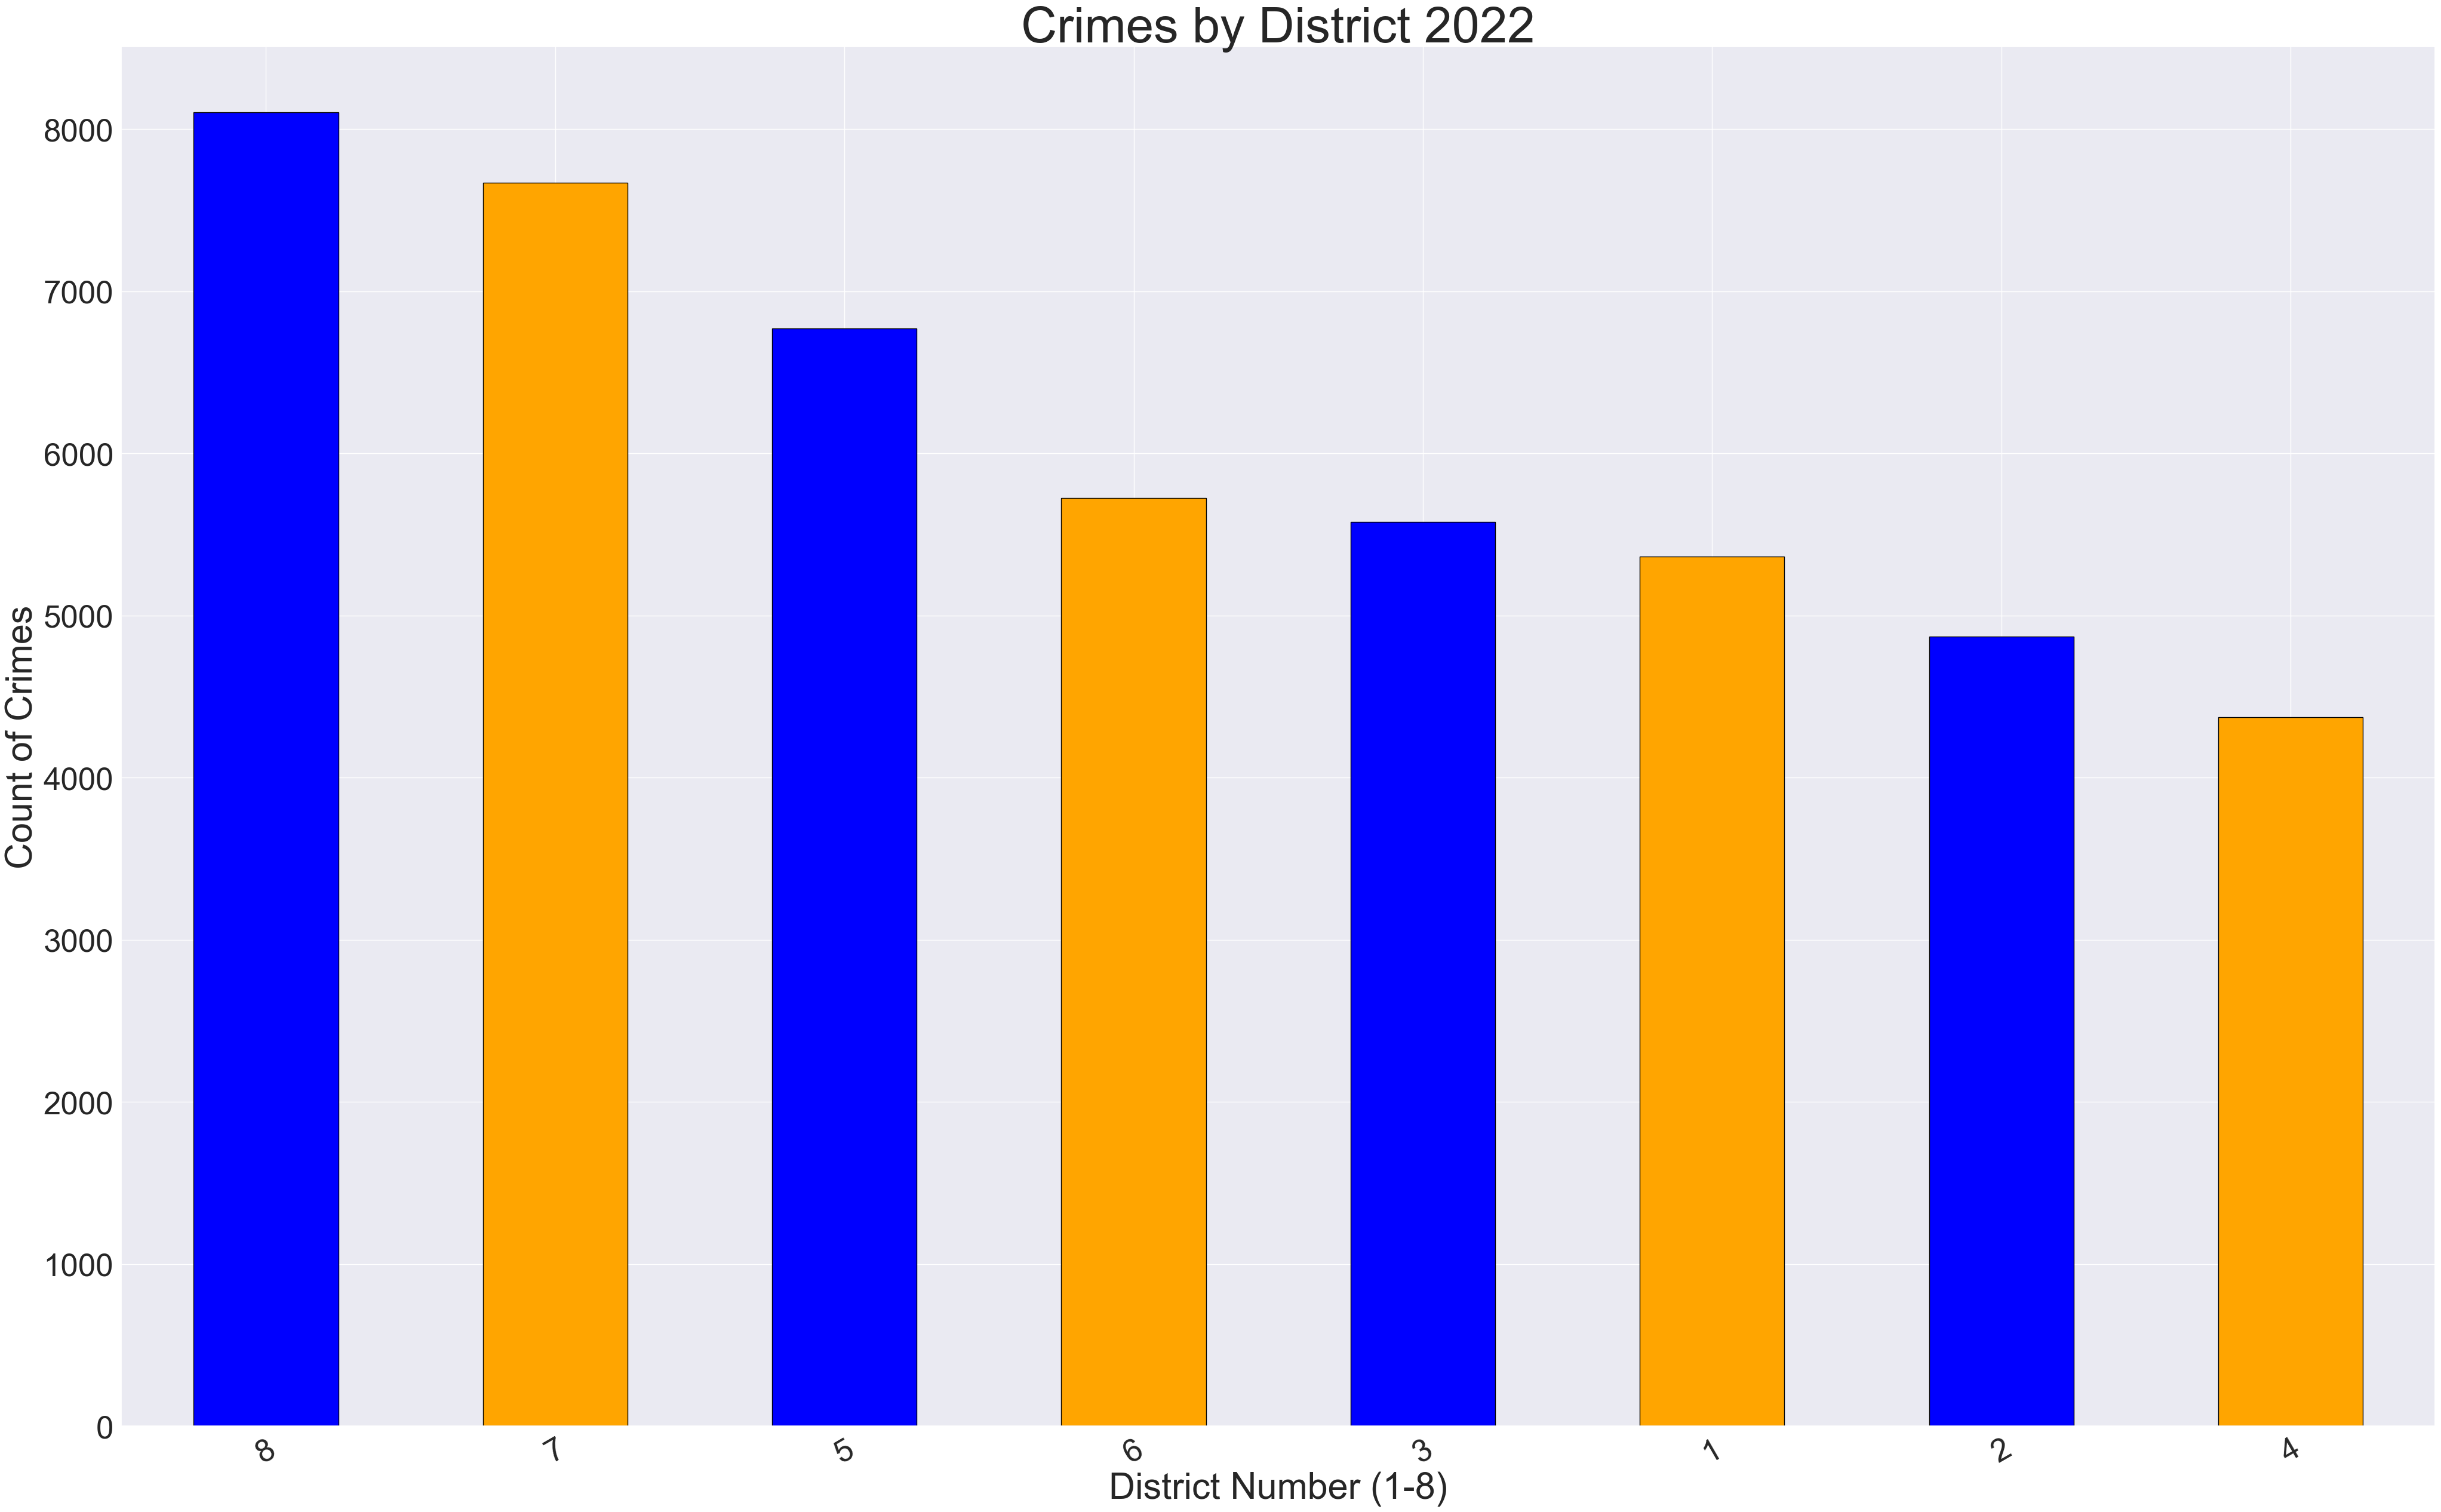

In [21]:
# Create a bar graph representing Signal_Description top ten with Counts
district_crimes_22.plot(kind='bar', edgecolor='black', rot=30, fontsize=38, color=["blue","orange"])
sns.set(style = 'darkgrid')

#add axis labels
plt.title("Crimes by District 2022", fontsize=60)
plt.xlabel('District Number (1-8)', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2022_district.png")

In [22]:
#crime_month = (reduced_crime_df["Occurred_Date_Time"].value_counts())[:10]
#crime_month

In [23]:
#fatality = reduced_crime_df["Victim_Fatal_Status"].value_counts()
#fatality

In [24]:
#reduced_crime_df["Offender_Gender"].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")
#plt.title("2022 Crime by Gender", fontsize=20)
# Save the figure
#plt.savefig("output_data/2018_gender.png")

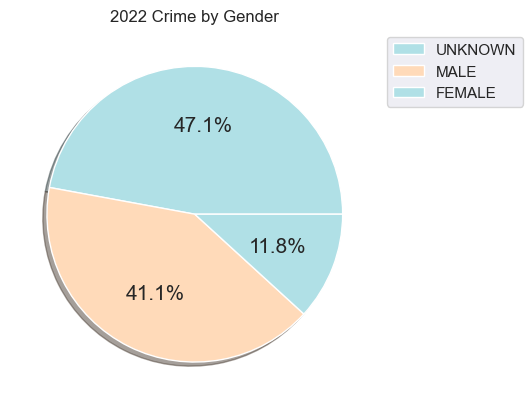

In [26]:
colors = ["#B0E0E6","#FFDAB9", "#B0E0E6","#FFDAB9"]
data = reduced_crime_df["Offender_Gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title="2022 Crime by Gender", fontsize=15, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output_data/2022_gender.png")
plt.show()

In [266]:
#reduced_crime_df.groupby("District")["Signal_Description"].count().sort_values(ascending=False)
#reduced_crime_df.groupby("Signal_Description")["District"].count().sort_values(ascending=True)
#reduced_crime_df.value_counts()